In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=7a0c0a1ecdcf5e50363aea82b9e3c46cfe84898e6202a7f93b99fd95b6038871
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print("Gpus-",len(tf.config.experimental.list_physical_devices('GPU')))

In [5]:
import tensorflow.keras
import os
from tensorflow.keras import backend as K

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import cv2
import os

In [114]:
cd ..

C:\Users\hp


In [139]:
df = pd.read_csv(r'Desktop\\fungiclef2022\\DF20-train_metadata.csv')
df.head()

,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path,class_id
0,2238546328,2018-04-16T00:00:00,2018.0,4.0,16.0,DK,Ulvedal Plantage,30872.0,Ramalina farinacea (L.) Ach.,Fungi,...,Viborg,2238546328-30620,bark of living trees,Ulfva Melchior Hvidegaard,56.299706,9.258110,50.0,Mixed woodland (with coniferous and deciduous ...,2238546328-30620.JPG,1273
1,2558871973,2020-01-03T00:00:00,2020.0,1.0,3.0,DK,Slotshegn,15256.0,Hysterium acuminatum Fr.,Fungi,...,Frederikssund,2558871973-53941,dead wood (including bark),Ole Martin,55.861899,11.975973,50.0,Deciduous woodland,2558871973-53941.JPG,708
2,2238503501,2017-08-22T00:00:00,2017.0,8.0,22.0,DK,Petersborg Strandenge,61200.0,Gliophorus perplexus (A.H.Sm. & Hesler) Kovalenko,Fungi,...,Vesthimmerland,2238503501-245559,soil,Per Taudal Poulsen,56.975158,9.285525,75.0,natural grassland,2238503501-245559.JPG,535
3,2446759075,2019-10-26T00:00:00,2019.0,10.0,26.0,DK,Klintebjerg,30530.0,Lecidella scabra (Taylor) Hertel & Leuckert,Fungi,...,Odsherred,2446759075-197643,stone,Susanne Rabenborg,55.960242,11.583103,15.0,gravel or clay pit,2446759075-197643.JPG,832
4,2238472345,2016-08-21T00:00:00,2016.0,8.0,21.0,DK,Blåbjerg,63728.0,"Russula fragilis Fr., 1838",Fungi,...,Varde,2238472345-167057,soil,Tom Smidth,55.742985,8.250188,50.0,Mixed woodland (with coniferous and deciduous ...,2238472345-167057.JPG,1338


In [140]:
filename=[]
category=[]

for index, row in df.iterrows():
    category.append(str(row[33]))
    filename.append(row[32].lower())
df1=pd.DataFrame({
    'filename':filename,
    'class':category,
})
        

In [141]:
df1

,filename,class
0,2238546328-30620.jpg,1273
1,2558871973-53941.jpg,708
2,2238503501-245559.jpg,535
3,2446759075-197643.jpg,832
4,2238472345-167057.jpg,1338
...,...,...
266339,2238575234-110923.jpg,327
266340,2238488482-318617.jpg,492
266341,2856918355-210091.jpg,886
266342,2238432527-313815.jpg,1427


Agaricomycetes        217875
Lecanoromycetes        16389
Sordariomycetes         8352
Leotiomycetes           6211
Pezizomycetes           5428
Myxomycetes             2756
Pucciniomycetes         2431
Dacrymycetes            1843
Tremellomycetes         1503
Geoglossomycetes        1264
Dothideomycetes          498
Eurotiomycetes           343
Taphrinomycetes          337
Protosteliomycetes       214
Ustilaginomycetes        158
Exobasidiomycetes        152
Orbiliomycetes           130
Atractiellomycetes       118
Mucoromycetes            106
Peronosporea              89
Microbotryomycetes        68
Arthoniomycetes           50
Name: class, dtype: int64

 Total images : 266344


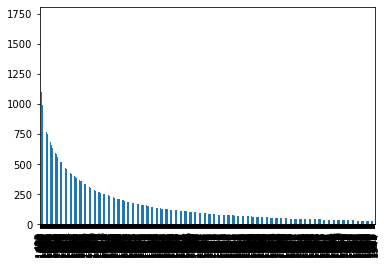

In [142]:
df1['class'].value_counts().plot.bar()
print(df['class'].value_counts())

print("\n Total images :",df1.shape[0])

In [143]:
filenames=os.listdir('Desktop\\fungiclef2022\\DF20-300px\\DF20_300')

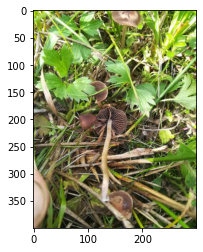

In [144]:
sample=random.choice(filenames)
image=load_img('Desktop\\fungiclef2022\\DF20-300px\\DF20_300\\'+sample)
plt.imshow(image)

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [146]:
model2=Sequential()

model2.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(96,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(320,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1604, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 36, 36, 64)       

In [147]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [148]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)
callbacks= [earlystop, learning_rate_reduction]

In [149]:
labels = {}
for i in range(1604):
    labels[i]=str(i)    

In [150]:
df1["class"]=df1["class"].replace(labels)

In [151]:
df1.head()

,filename,class
0,2238546328-30620.jpg,1273
1,2558871973-53941.jpg,708
2,2238503501-245559.jpg,535
3,2446759075-197643.jpg,832
4,2238472345-167057.jpg,1338


1486    1400
492     1257
687     1184
1186     992
489      954
        ... 
675       20
609       20
530       20
1150      19
1231      19
Name: class, Length: 1604, dtype: int64

 Total train images:  213075


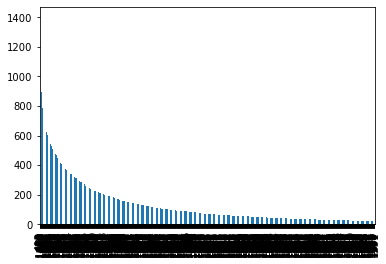

In [152]:
train_df, validate_df = train_test_split(df1, test_size=0.20, random_state=0)

train_df = train_df.reset_index(drop=True)

train_df['class'].value_counts().plot.bar()
print(train_df['class'].value_counts())
print("\n Total train images: ",train_df.shape[0])

1486    322
492     312
687     288
99      244
1186    236
       ... 
875       2
436       2
878       2
498       2
115       2
Name: class, Length: 1604, dtype: int64

 Total validate integer:  53269


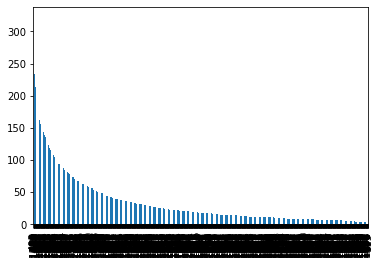

In [153]:
validate_df = validate_df.reset_index(drop=True)
validate_df['class'].value_counts().plot.bar()

print(validate_df['class'].value_counts())
print("\n Total validate integer: ", validate_df.shape[0])

In [154]:
train_df['filename']

0         2424122817-343287.jpg
1         2860313391-285659.jpg
2         2351007127-340089.jpg
3         2575121975-204654.jpg
4         2238504351-245686.jpg
                  ...          
213070    2981240364-145784.jpg
213071    2237962722-302365.jpg
213072    2237963902-302437.jpg
213073     2238479964-93756.jpg
213074     2238534983-28948.jpg
Name: filename, Length: 213075, dtype: object

In [155]:
validate_df['filename']

0        2237930246-225891.jpg
1         2430665893-48229.jpg
2         2598726218-57227.jpg
3        2238459406-239933.jpg
4          2238186193-9276.jpg
                 ...          
53264    2238587211-261600.jpg
53265    2238484415-168655.jpg
53266    2238498635-170824.jpg
53267     2981231403-71642.jpg
53268      2238136883-6954.jpg
Name: filename, Length: 53269, dtype: object

In [156]:
if train_df['filename'][0:600] is validate_df['filename']:
    print("Same")
else:
    print("False")

False


In [157]:
train_files_df=train_df.copy()
validate_files_df=validate_df.copy()

train_files_df.to_csv('train_files.csv', index=False)
validate_files_df.to_csv

<bound method NDFrame.to_csv of                     filename class
0      2237930246-225891.jpg   895
1       2430665893-48229.jpg  1532
2       2598726218-57227.jpg   705
3      2238459406-239933.jpg  1533
4        2238186193-9276.jpg   670
...                      ...   ...
53264  2238587211-261600.jpg  1128
53265  2238484415-168655.jpg   266
53266  2238498635-170824.jpg   845
53267   2981231403-71642.jpg   366
53268    2238136883-6954.jpg  1602

[53269 rows x 2 columns]>

In [158]:
total_train = train_df.shape[0]
print("Total train images:", total_train)
total_validate = validate_df.shape[0]
print("Total validate images:", total_validate)

Total train images: 213075
Total validate images: 53269


In [159]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df,"Desktop\\fungiclef2022\\DF20-300px\\DF20_300\\",x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=100)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,"Desktop\\fungiclef2022\\DF20-300px\\DF20_300\\",x_col='filename',y_col='class',target_size=(150,150),class_mode='categorical',batch_size=100)

Found 213075 validated image filenames belonging to 1604 classes.
Found 53269 validated image filenames belonging to 1604 classes.


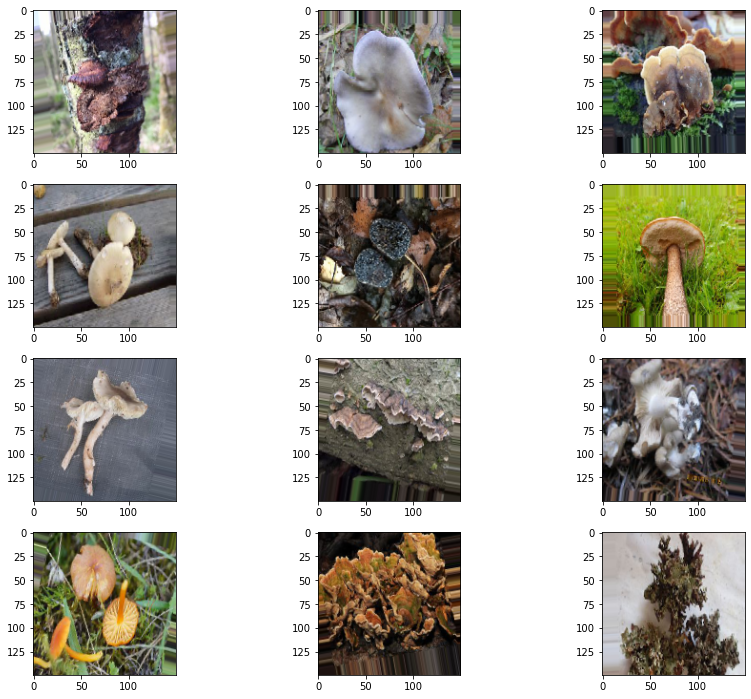

In [32]:
plt.figure(figsize=(12,12))
for i in range(0,12):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image= X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=10
batch_size=64

history = model2.fit(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate/batch_size,
steps_per_epoch=total_train/batch_size,
callbacks=callbacks
)

Epoch 1/10
3329/3329 [==============================] - 6160s 2s/step - loss: 7.0731 - accuracy: 0.0062 - val_loss: 6.9556 - val_accuracy: 0.0066 - lr: 0.0010
Epoch 2/10
3329/3329 [==============================] - 6424s 2s/step - loss: 6.9397 - accuracy: 0.0068 - val_loss: 6.8434 - val_accuracy: 0.0070 - lr: 0.0010
Epoch 3/10
3329/3329 [==============================] - 6704s 2s/step - loss: 6.8491 - accuracy: 0.0082 - val_loss: 6.7082 - val_accuracy: 0.0103 - lr: 0.0010
Epoch 4/10
3329/3329 [==============================] - 6464s 2s/step - loss: 6.7559 - accuracy: 0.0094 - val_loss: 6.6338 - val_accuracy: 0.0114 - lr: 0.0010
Epoch 5/10
3329/3329 [==============================] - 6472s 2s/step - loss: 6.6977 - accuracy: 0.0096 - val_loss: 6.5869 - val_accuracy: 0.0120 - lr: 0.0010
Epoch 6/10
3329/3329 [==============================] - 6353s 2s/step - loss: 6.6638 - accuracy: 0.0096 - val_loss: 6.5411 - val_accuracy: 0.0146 - lr: 0.0010
Epoch 7/10
3329/3329 [========================

In [160]:
epochs=10
batch_size=100

history = model2.fit(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate/batch_size,
steps_per_epoch=total_train/batch_size,
callbacks=callbacks
)

Epoch 1/10
2130/2130 [==============================] - 6907s 3s/step - loss: 6.7853 - accuracy: 0.0113 - val_loss: 6.3662 - val_accuracy: 0.0274 - lr: 0.0010
Epoch 2/10
2130/2130 [==============================] - 7173s 3s/step - loss: 6.1407 - accuracy: 0.0319 - val_loss: 5.8602 - val_accuracy: 0.0465 - lr: 0.0010
Epoch 3/10
2130/2130 [==============================] - 7077s 3s/step - loss: 5.8037 - accuracy: 0.0470 - val_loss: 5.6384 - val_accuracy: 0.0564 - lr: 0.0010
Epoch 4/10
2130/2130 [==============================] - 7147s 3s/step - loss: 5.6330 - accuracy: 0.0549 - val_loss: 5.5307 - val_accuracy: 0.0645 - lr: 0.0010
Epoch 5/10
2130/2130 [==============================] - 7124s 3s/step - loss: 5.5241 - accuracy: 0.0613 - val_loss: 5.6009 - val_accuracy: 0.0593 - lr: 0.0010
Epoch 6/10
2130/2130 [==============================] - 7308s 3s/step - loss: 5.4543 - accuracy: 0.0661 - val_loss: 5.4953 - val_accuracy: 0.0683 - lr: 0.0010
Epoch 7/10
2130/2130 [========================

In [29]:
epochs=5
batch_size=64

history = model2.fit(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate/batch_size,
steps_per_epoch=total_train/batch_size,
callbacks=callbacks
)

Epoch 1/5
3329/3329 [==============================] - 6344s 2s/step - loss: 6.8413 - accuracy: 0.0095 - val_loss: 6.5929 - val_accuracy: 0.0203 - lr: 0.0010
Epoch 2/5
3329/3329 [==============================] - 6966s 2s/step - loss: 6.2924 - accuracy: 0.0262 - val_loss: 6.0404 - val_accuracy: 0.0414 - lr: 0.0010
Epoch 3/5
3329/3329 [==============================] - 6934s 2s/step - loss: 5.9633 - accuracy: 0.0393 - val_loss: 5.7490 - val_accuracy: 0.0555 - lr: 0.0010
Epoch 4/5
3329/3329 [==============================] - 6913s 2s/step - loss: 5.8160 - accuracy: 0.0454 - val_loss: 5.7542 - val_accuracy: 0.0524 - lr: 0.0010
Epoch 5/5
3329/3329 [==============================] - 6760s 2s/step - loss: 5.7334 - accuracy: 0.0489 - val_loss: 5.7751 - val_accuracy: 0.0471 - lr: 0.0010


No handles with labels found to put in legend.


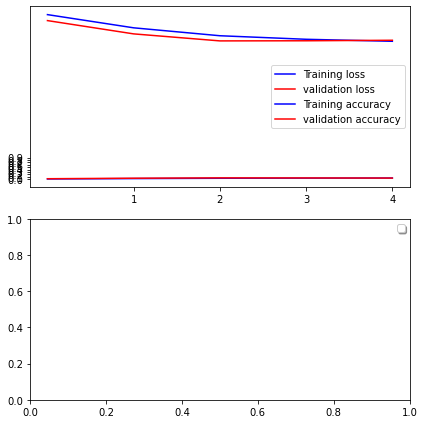

In [104]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.plot(history.history['loss'],color='b',label="Training loss")
ax1.plot(history.history['val_loss'],color='r',label="validation loss")
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))
ax1.legend()

ax1.plot(history.history['accuracy'],color='b',label="Training accuracy")
ax1.plot(history.history['val_accuracy'],color='r',label="validation accuracy")
ax1.set_xticks(np.arange(1,epochs,1))
ax1.legend()

legend=plt.legend(loc='best',shadow=True)
plt.tight_layout()
plt.show()

In [34]:
!pip install pyyaml h5py

In [161]:
model2.save('Desktop\model2.hdf5')

In [162]:
model2.save('Desktop\model2.h5')

In [163]:
model2.save('Desktop\model2')

INFO:tensorflow:Assets written to: Desktop\model2\assets


In [50]:
import pandas as pd

In [91]:
df1 = pd.read_csv(r'Desktop\fungiclef2022\FungiCLEF2022_test_metadata.csv')
df1.head()

,Unnamed: 0,ObservationId,eventDate,month,day,countryCode,Location_lvl0,Location_lvl3,Location_lvl2,Location_lvl1,Substrate,Habitat,filename
0,0,3305985310,2021-06-15T00:00:00,6.0,15.0,DK,Ellesøen,Denmark,Sjælland,Køge,dead wood (including bark),Bog woodland,0-3305985310.JPG
1,1,3305985310,2021-06-15T00:00:00,6.0,15.0,DK,Ellesøen,Denmark,Sjælland,Køge,dead wood (including bark),Bog woodland,1-3305985310.JPG
2,2,3305985310,2021-06-15T00:00:00,6.0,15.0,DK,Ellesøen,Denmark,Sjælland,Køge,dead wood (including bark),Bog woodland,2-3305985310.JPG
3,3,3305985311,2021-06-15T00:00:00,6.0,15.0,DK,Lemvig Sødal,Denmark,Midtjylland,Lemvig,living leaves,meadow,0-3305985311.JPG
4,4,3305985311,2021-06-15T00:00:00,6.0,15.0,DK,Lemvig Sødal,Denmark,Midtjylland,Lemvig,living leaves,meadow,1-3305985311.JPG


In [95]:
ObservationId=[]
ClassId=[]
predicted=[]

for index, row in df1.iterrows():
    ObservationId.append(row[1])
    ClassId.append(row[12].lower())


In [101]:
predicted=model2.predict(ClassId)

ValueError: in user code:

    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "conv2d_5" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None


In [92]:
df2=pd.DataFrame({
    'ObservationId':ObservationId,
    'ClassId':predicted,
})

NameError: name 'predicted' is not defined

In [85]:
from PIL import Image
import os,sys

def resize(img_name):
    img=cv2.imread('Desktop/fungiclef2022/DF21_300/'+img_name)
    img=cv2.resize(img,(150,150))
    return img

In [87]:
os.mkdir('Desktop/fungiclef2022/test')

In [89]:
for index,row in df1.iterrows():
    cv2.imwrite('Desktop/fungiclef2022/test/'+row[12].lower(),resize(row[12].lower()))

In [77]:
df2.to_csv('Desktop\sub2.csv',index=False)